## Sandia Analysis - Season Length
Assess how season length is changing

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load Data
data = pd.read_pickle('../data/NMData/sandia_snow.pkl')
data.head()

,swe_mm,depth_mm,depth_in
time,,,
1981-10-01,0.0,0.0,0.0
1981-10-02,0.0,0.0,0.0
1981-10-03,0.0,0.0,0.0
1981-10-04,0.0,0.0,0.0
1981-10-05,0.0,0.0,0.0


### Initial Plot

<AxesSubplot: xlabel='time'>

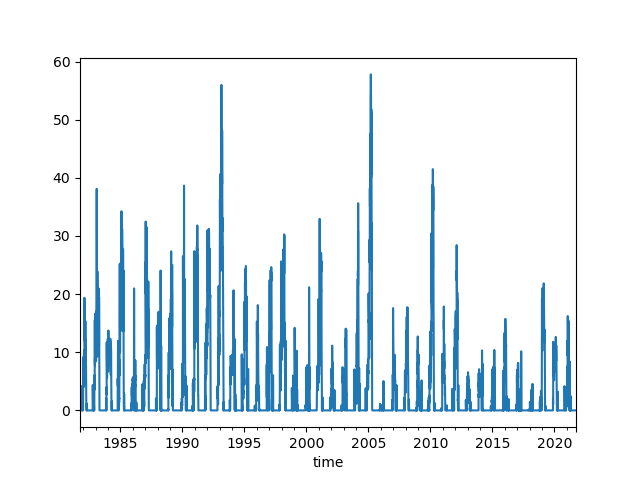

In [3]:
fig1, ax1 = plt.subplots(1,1)
data['depth_in'].plot(ax=ax1)

* There does appear to be a subtle trend toward decreasing peaks
* 2006 was a really bad year... I don't remember it
* When was I a ski patroller? 2007, 2008?
* 2005 (wy 2004) was the best season on record

In [ ]:
fig2, ax2 = plt.subplots(1,1)
data['swe_mm'].plot(ax=ax2)

* The 80s and 90s definitely appear to be wetter than the 2000's, does that agree with broader precip trends?

In [4]:
#Add a day index column for extracting data later
data['day_index'] = range(1,len(data) + 1)
data.head()

,swe_mm,depth_mm,depth_in,day_index
time,,,,
1981-10-01,0.0,0.0,0.0,1
1981-10-02,0.0,0.0,0.0,2
1981-10-03,0.0,0.0,0.0,3
1981-10-04,0.0,0.0,0.0,4
1981-10-05,0.0,0.0,0.0,5


In [ ]:
data['2005-03-19':'2005-03-22'].head()

## Season Length
Try to calculate season length based on a "skiable" snow depth
* I am not sure how they calculate density so it isn't clear if I should use depth or density.
* Try depth = 5in

In [5]:
data['hydro_year'] = data.index.year
data['hydro_year'].loc[data.index.month >= 9] += 1
data.head()

C:\Users\clmbn\AppData\Local\Temp\ipykernel_9012\680670986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hydro_year'].loc[data.index.month >= 9] += 1


,swe_mm,depth_mm,depth_in,day_index,hydro_year
time,,,,,
1981-10-01,0.0,0.0,0.0,1,1982
1981-10-02,0.0,0.0,0.0,2,1982
1981-10-03,0.0,0.0,0.0,3,1982
1981-10-04,0.0,0.0,0.0,4,1982
1981-10-05,0.0,0.0,0.0,5,1982


In [6]:
#Trying anchored offsets
dataWY_length = data[data['depth_in'] > 5].resample('AS-SEP').agg({'hydro_year':'first','depth_in':'count'})

In [ ]:
dataWY_length.head()

<AxesSubplot: xlabel='time'>

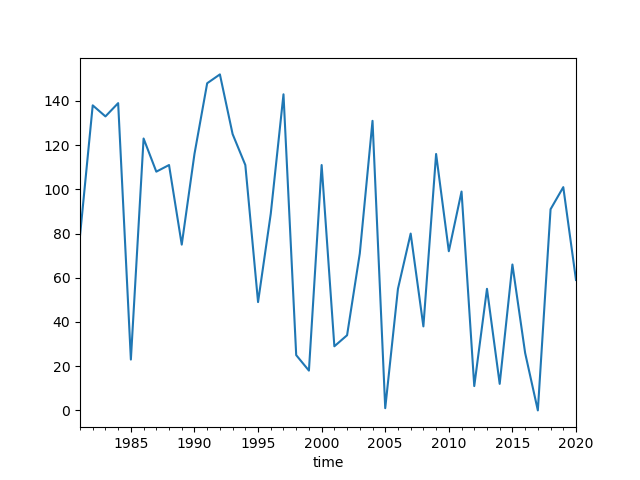

In [7]:
fig4, ax4 = plt.subplots(1,1)
dataWY_length['depth_in'].plot(ax=ax4)

### Season Phase
Have start and end of season drifted?

In [8]:
import numpy as np

In [9]:
#Create secondary date column
data['date'] = data.index

In [10]:
#Same resampling as earlier but find first/last
dataWY_start = data[data['depth_in'] > 5].resample('AS-SEP').agg({'hydro_year':'first','depth_in':'first','date':'first'})
dataWY_end = data[data['depth_in'] > 5].resample('AS-SEP').agg({'hydro_year':'last','depth_in':'first','date':'last'})

In [11]:
dataWY_start['dayofwateryear'] = (dataWY_start['date'] - dataWY_start.index).to_numpy() / np.timedelta64(1, 'D')
dataWY_end['dayofwateryear'] = (dataWY_end['date'] - dataWY_end.index).to_numpy() / np.timedelta64(1, 'D')

In [12]:
dataWY_start.head()

,hydro_year,depth_in,date,dayofwateryear
time,,,,
1981-09-01,1982.0,7.401575,1982-01-02,123.0
1982-09-01,1983.0,6.062992,1982-12-01,91.0
1983-09-01,1984.0,8.149607,1983-11-26,86.0
1984-09-01,1985.0,5.472441,1984-10-16,45.0
1985-09-01,1986.0,5.472441,1985-12-31,121.0


In [ ]:
dataWY_end.head()

In [12]:
dataWY_start.set_index('hydro_year')

,depth_in,date,dayofwateryear
hydro_year,,,
1982.0,7.401575,1982-01-02,123.0
1983.0,6.062992,1982-12-01,91.0
1984.0,8.149607,1983-11-26,86.0
1985.0,5.472441,1984-10-16,45.0
1986.0,5.472441,1985-12-31,121.0
1987.0,5.157480,1986-11-23,83.0
1988.0,14.330709,1987-12-13,103.0
1989.0,5.669291,1988-11-19,79.0
1990.0,8.031496,1990-01-03,124.0


<AxesSubplot: xlabel='time'>

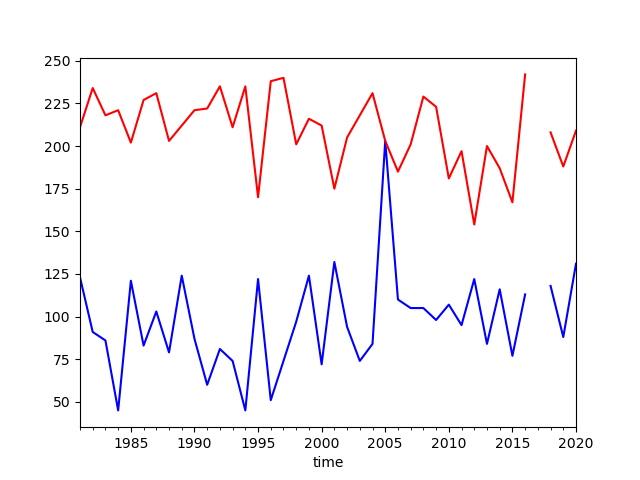

In [13]:
fig5, ax5 = plt.subplots(1,1)
dataWY_start['dayofwateryear'].plot(ax=ax5,color='blue')
dataWY_end['dayofwateryear'].plot(ax=ax5,color='red')

* There appears to be a trend toward later start and slightly earlier ending